# About the file
The data for this project can be downloaded for this [kaggle](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop). This file contains behavior data for a one month (December 2019) from a large multi-category online store. 


Each row in the file represents an event. All events are related to products and users. There are different types of events.

*File structure*
- event_time: Time when event happened at (in UTC).

- event_type : can be:
view - a user viewed a product
cart - a user added a product to shopping cart
removefromcart - a user removed a product from shopping cart
purchase - a user purchased a product
Typical funnel: view => cart => purchase.

- product_id: ID of a product

- category_id: Product's category ID

- category_code

- Product's category taxonomy (code name) if it was possible to make it. Usually present for meaningful categories and skipped for different kinds of accessories.

- brand: Downcased string of brand name. Can be missed.

- price: Float price of a product. Present.

- user_id: Permanent user ID.

- user_session: Temporary user's session ID. Same for each user's session. Is changed every time user come back to online store from a long pause.

- Multiple purchases per session: A session can have multiple purchase events. It's ok, because it's a single order.

#### Team members

- [Nibesh Khadka](https://github.com/nibukdk)
- [Ngoc Hoang(Hannah)](https://github.com/htmn88)
- [Bao Pham](https://www.kaggle.com/baoph153)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Oct.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Nov.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2020-Feb.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2020-Jan.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Dec.csv


# 1. Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import dask
import dask.dataframe as dd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# # Display all cell outputs
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'


from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
import plotly.graph_objs as go
# import chart_studio.plotly as py

init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# Set global theme
cf.set_config_file(world_readable=True, theme='pearl')

# 2. Import data

Notes: link on how to fecth kaggle data to google colab \
 https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [4]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# # /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [5]:
# #changing the working directory
# %cd /content/gdrive/My Drive/Kaggle
# #Check the present working directory using pwd command 

In [6]:
# !kaggle datasets download -d mkechinov/ecommerce-events-history-in-cosmetics-shop

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 149, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
# #unzipping the zip files and deleting the zip files
# !unzip \2019-Dec.csv.zip  && rm *.zip

In [8]:
# from glob import glob
# df1 = dd.read_csv(os.path.join('/content/gdrive/My Drive/Kaggle/2019-Dec.csv'))

df1 = dd.read_csv("/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Dec.csv")

In [9]:
df1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


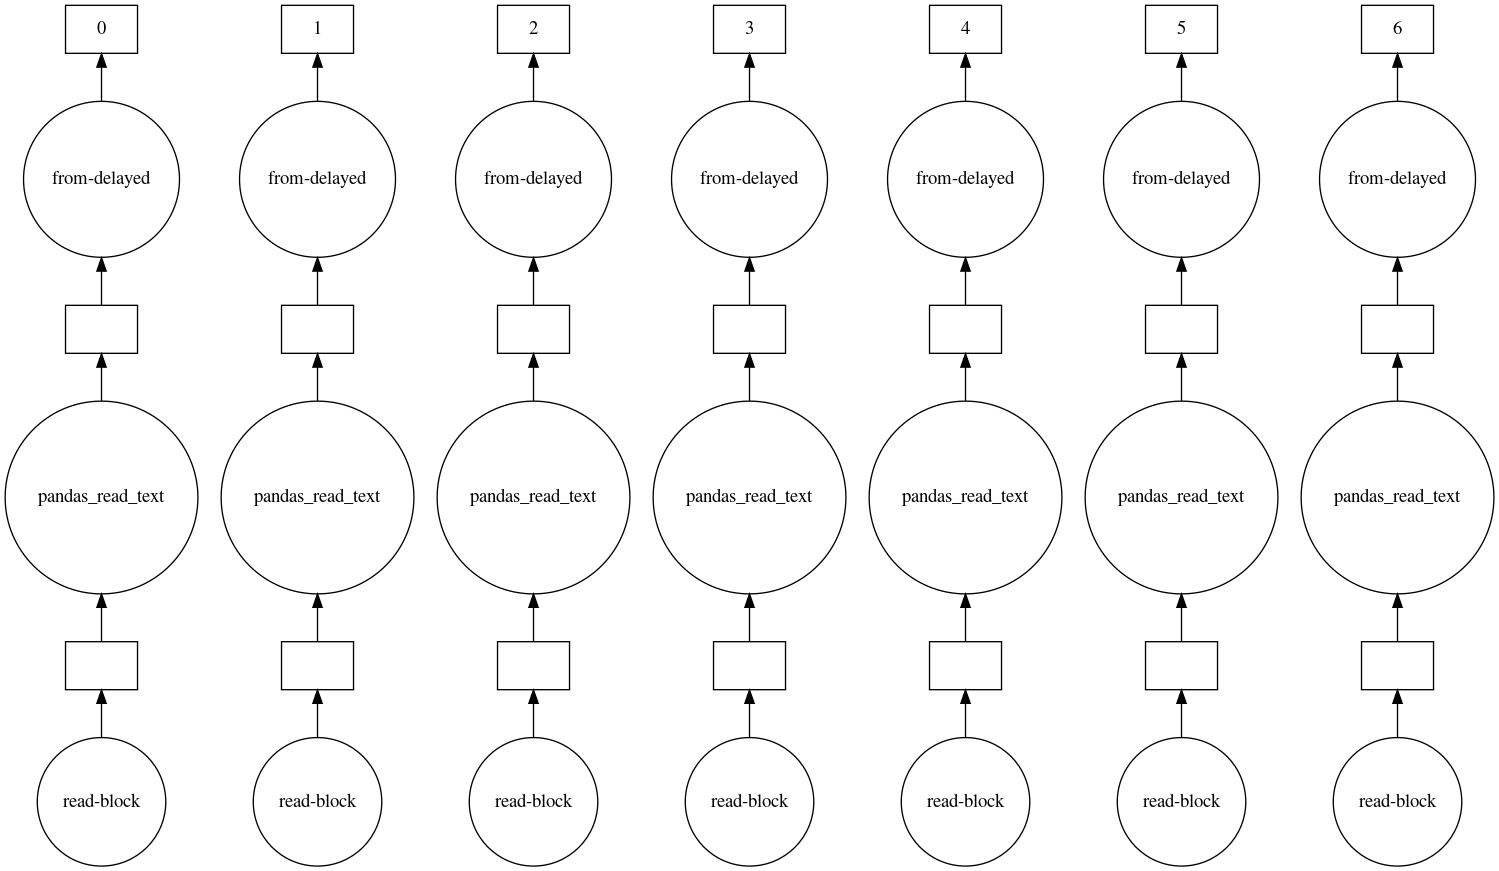

In [74]:
# df1.visualize(filename="dask_visualize.png")
df1.visualize()


In [11]:
df1.npartitions

7

In [12]:
# Using verbose displays full info
# df1.info(verbose=True)

In [13]:
df1.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

# 3. Data Cleaning

## Data sampling

In [14]:
sample_df = df1.sample(frac = 0.3, random_state=101)

In [15]:
sample_df.info(verbose=True)

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 1059985 entries, 252392 to 179266
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   event_time     1059985 non-null      object
 1   event_type     1059985 non-null      object
 2   product_id     1059985 non-null      int64
 3   category_id    1059985 non-null      int64
 4   category_code  17641 non-null      object
 5   brand          606464 non-null      object
 6   price          1059985 non-null      float64
 7   user_id        1059985 non-null      int64
 8   user_session   1059761 non-null      object
dtypes: object(5), float64(1), int64(3)

### Null Columns 

In [16]:

# Create null cols and non-null columns
null_cols = sample_df.columns[sample_df.isnull().sum().compute()>0]
# Non nulls are those with same lenght as df
not_null_cols = sample_df.columns[sample_df.notnull().sum().compute()==20692840]
# Create null df and non-null df
null_df= sample_df[null_cols]
not_null_df= sample_df[not_null_cols]


To prevent from running multiple types create variables will null count sum 

### Missing data





In [17]:
df_null_sum = sample_df.isnull().sum().compute()
df_is_null = sample_df.isnull().compute()

In [18]:
#sample_null = df_is_null.sample(100000, random_state=101)
sample_null_sort = df_is_null.sort_values('user_id')

Text(0.5, 1.0, 'Missing values in sample dataset')

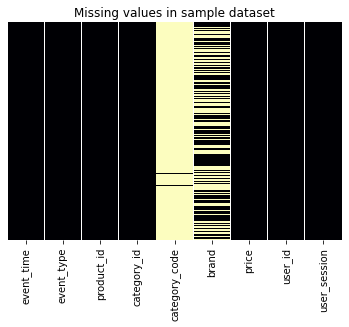

In [81]:
# Using sample to prevent kernel crash
# plt.figure(figsize=(10,6),)
sns.heatmap(sample_null_sort,cbar=False, cmap='magma', yticklabels=False,)
plt.title('Missing values in sample dataset')
# plt.savefig("Missing Val Visualization.png",dpi=100)

There are three null columns: *category_code, user_session  and brand*. They all are nominal-qualitative variables. Due to lack of correlation measure for nominal variables we'll skip the correlation measurement steps.


## Missing values in "category_code" column

Since there are many missing values in the category_code columns and there is category_id column which is closely related with category_code. We can drop the category_code column

In [20]:
# sample_df['category_code'].value_counts().compute()

In [21]:
new_df = sample_df.drop(columns = 'category_code', axis = 1).copy() #drop the category_code column

## Replace missing values in "brand" column

In [22]:
# (new_df.brand.isnull().sum()/len(new_df)).compute() #Check the proportion of null values in brand column

In [23]:
new_df.brand = new_df.brand.replace(np.nan,'Not Available') #replace Nan values to 'Not available' text

In [24]:
# new_df.brand.value_counts().compute() 

## Remove negative values in "price" column

In [25]:
new_df['price'].describe().compute() # check statistic state of price column

count    1.059985e+06
mean     8.856059e+00
std      1.978772e+01
min     -7.937000e+01
25%      2.480000e+00
50%      4.440000e+00
75%      7.940000e+00
max      3.277800e+02
Name: price, dtype: float64

In [26]:
# len(new_df['price'][new_df['price']<0])/len(new_df['price']) 
# % of column with negative price comparing with total amount of values in price column

As percentage of rows with negative price values is so small in sample set, all these rows will be removed from sample dataset.

In [27]:
new_df = new_df[new_df['price']>= 0] # take only rows with positive values in price column

## Replace missing values in "user_session" column

In [28]:
# (new_df.user_session.isnull().sum()/len(new_df)).compute()

In [29]:
new_df.user = new_df.user_session.replace(np.nan, 'Not Available') #replace Nan values with 'Not Available' text

Create new pandas dataframe to compute faster


In [30]:
pd_df = new_df.compute()

### Reset Date into index


Direct reset from event_time gives error. It must be due to padding. i.e month and day are of one length instead of 2, for eg  month =1 instead of month = 01.
So, extract each section from yr, month, day, hr, timezone and so on.  Create two time series one for date and another for time.

- Pad the month and day using zfill. 
- Again join yr,month day
- Change to date time 
- Assign to df
- Reset index 
- Drop unnecessary columns


In [31]:
pd_df.event_time[:1].str.slice(-3)

252392    UTC
Name: event_time, dtype: object

#### Extraction


In [32]:
# date = pd_df.event_time.str.slice(0,10)
yr=  pd_df.event_time.str.slice(0,4)
mo = pd_df.event_time.str.slice(5,7)
da = pd_df.event_time.str.slice(8,10)
time = pd_df.event_time.str.slice(10,-3).str.strip()
time_zone = pd_df.event_time.str.slice(-3).str.strip()



In [33]:
hr = time.str.slice(0,2).str.strip()

min = time.str.slice(3,5).str.strip()

sec= time.str.slice(6).str.strip()


#### Padding

In [34]:
mo = mo.str.zfill(2)
da =da.str.zfill(2)

In [35]:
hr = hr.str.zfill(2)
min=min.str.zfill(2)
sec= sec.str.zfill(2)

#### Join
also change to df

In [36]:
date_df = pd.DataFrame({'yr':yr,'mo':mo,'da':da})
date = date_df.astype(str).apply("-".join,axis=1)


In [37]:
time_df = pd.DataFrame({'hr':hr,'min':min,'sec':sec})
time = time_df.astype(str).apply(":".join,axis=1)


#### Assign, Change and Reset


In [38]:
pd_df['Date'] = date 


In [39]:
pd_df['time'] = time

In [40]:
pd_df['Date'] = pd.to_datetime(pd_df['Date'], format="%Y-%m-%d")

In [41]:
pd_df['hr'] = pd.to_datetime(pd_df['time'], format="%H:%M:%S").dt.hour
# pd_df['hr'] = pd.to_datetime(pd_df['time'], format="%H:%M:%S").dt.time

In [42]:
# Set index and drop
pd_df.set_index('Date', inplace=True, drop=True)

In [43]:
# drop event_type columns and time for now 
pd_df.drop(['event_time','time'], axis=1, inplace=True)

In [44]:
# pd_df.head()

# 4. Data Analysis

Questions to answers:
1. What are regular customer actions? What is the amount of visitors by dates in the ecommerce store?
Percentage of each action and time stamp for those? ==> conclusion on activities of customers during day hours ==> conclusion for advises helping marketing team tailored based on customer activities.
2. Products most seen by customers (event_type = cart)? What are characteristics of these products (price, brand, category) and their seasonalities? ==> product portfolio for business development


## 4.1 What are regular customer actions? Percentage of each action and time stamp for those? ==> conclusion on activities of customers during day hours ==> conclusion for advises helping marketing team tailored based on customer activities.


In [45]:
# Just incase if we need dask df

new_df = dd.from_pandas(pd_df, npartitions=7)

In [46]:
# Check customer behavior on the site
custmoer_behavior_share =new_df.event_type.value_counts().compute()/len(new_df)*100

In [47]:
labels = custmoer_behavior_share.index.tolist()
values = custmoer_behavior_share.values.tolist()


In [114]:
# install ocra to save file in plotly
# !conda install -c plotly plotly-orca

In [97]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict( line=dict(color='#000000', width=2)),)
fig.update_layout(title="Customer Beahviour",
                 
                    font=dict(
                        family="Courier New, monospace",
                              size=18,
                              color="#7f7f7f"))
# fig.show(renderer="colab")
fig.show(renderer="kaggle")
# fig.write_image("/kaggle/working/Customer_Behavior.png")





Observations:
- Customer purchased only 6% of items while viewd about 48% of items in online store. 
- The items added to cart were around 26% and removed are arpund 18%. 
- It is noticeable that almost 69% of the products added in cart was removed (3 979 679/5 768 333)

In ecommerce, the conversion rate represents the percentage of visitors that make a purchase. In this case it is 6.21% which is really high compare to the average conversion rate in general in ecommerce


In [49]:
# How many visitors every day at the site
visitor_by_date = pd_df.groupby(pd_df.index)['user_id'].nunique()

In [50]:
# days are numbered fromo 0-7 starting from monday.
# so 0-4 gives monday-friday
#5 and 6 gives sat and sunday
weekends_df = pd_df[pd_df.index.dayofweek>4]
weekdays_df = pd_df[pd_df.index.dayofweek<=4]

In [51]:
# Separate visitord by weekdays and weekends
weekends_visitors = weekends_df.groupby(weekends_df.index)['user_id'].nunique()
weekdays_visitors = weekdays_df.groupby(weekdays_df.index)['user_id'].nunique()

In [52]:
# Experiment of gaining size value but with same denominator, this is done to gain different markers  size in scatter plot.
print(weekdays_visitors.values//200)
print(weekends_visitors.values//200)

[51 50 51 48 46 54 52 53 50 46 52 50 50 47 42 48 45 44 41 37 32 16]
[46 41 45 43 48 41 42 36 35]


In [98]:
fig = go.Figure()
fig.add_trace(go.Scatter(
            x=weekends_visitors.index.tolist(), y=weekends_visitors.values.tolist(),mode="lines+markers", name="Weekends",marker=dict(size=weekends_visitors.values//200)))
fig.add_trace(go.Scatter(
            x=weekdays_visitors.index.tolist(), y=weekdays_visitors.values.tolist(),mode="markers",name="Weekdays",marker=dict(size=weekdays_visitors.values//200)))
fig.update_layout(title="Number of Visits Everyday", xaxis_title="December 1 - 31",yaxis_title="Frequency")
fig.show(renderer="kaggle")
# fig.write_image("/kaggle/working/Number of Visits Everyday.png")


In figure,there is a significant decrease in the amount of visitors on as we approach the end of the month. This may be becuase of the holiday season which is typically from 24th of December. People may travel and celebrate instead of shopping online.
The week # 2 has most visitors, with Monday Dec 9 gaining 10.98k visitors, while last week sees the least customers with 31st December having 3.3k visitors which is the least amount.

Whats more theres always decrease in the customer number as the weekend approaches and rises again from Monday.

Customer behavior on Page by days:

In [54]:
event_by_date = pd_df.groupby(pd_df.index)['event_type']
y = pd.DataFrame(event_by_date.value_counts().unstack())
y_d = np.array(y[['view','cart','remove_from_cart','purchase']])

In [55]:
title = 'Visitor actions on Page'
labels = ['View', 'Cart', 'Remove from cart', 'Purchase']
colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']

mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

x_data = y.index
y_data = y_d

fig = go.Figure()
for i in range(0,4):
    fig.add_trace(go.Scatter(x=x_data, y = y_d[:,i], mode='lines',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)


annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.08, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=10),
                                  showarrow=False))
    
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Dec 2019',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Visitor behavior on Page',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.show(renderer="kaggle")



## 4.2 Product portfolio analysis

### Brands analysis

In this section, columns event_time, event_type and price will be used as main analysis input for the analysis. 

Column brand will be used partly in this but not in co-operation with the other 3 columns as more than 42.6% of values in brand column is missing. Any conclusion drawed from this column will be for reference only.

In [57]:
brand = new_df['brand'].value_counts().compute()
print(brand)

Not Available    453514
runail            76818
grattol           46786
irisk             45737
masura            37568
                  ...  
fly                   1
voesh                 1
bodipure              1
ikoo                  1
macadamia             1
Name: brand, Length: 249, dtype: int64


In [99]:
fig = go.Figure(data=[go.Histogram(x=brand[1:],nbinsx=10, histnorm='probability')])
fig.update_layout(
    title_text='Brand Frequency', # title of plot
    xaxis_title_text='Brand Appearance Frequency', # xaxis label
    yaxis_title_text='Percentage', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    #bargroupgap=0.1 # gap between bars of the same location coordinates
)
# fig.show(renderer="colab")
fig.show(renderer="kaggle")
# fig.write_image("/kaggle/working/Brand.png")

93.9% of mentioned brands are refered under 10000 times while the brand with top apprearance is mentioned up to 80000 times, almost 8 times more than regular brand. As a result, we will do more analysis how 6.1% (15 brands) of all brands make a diffirent to be mentioned/considered more during purchase decision process. 

In [59]:
# create a list of brands (different from Not available) mentioned more than 10000 times.
brand_list = brand[1:][brand >= 10000].index 
# filter out a list of rows with brands in top 6.1%
best_brands = new_df[new_df['brand'].isin(brand_list)]

In [ ]:
len(brand_list) # count top 6.1% brands

In [60]:
j = new_df['event_type'].value_counts().compute()
j = j.drop('remove_from_cart')
j 

view        518498
cart        278173
purchase     63667
Name: event_type, dtype: int64

From above tabletable of sample dataset, total of items added to cart is about 53.6% of total item viewed, however, only 22.9% of added-to-cart items was purchased, equivalent to 12.8% of viewed items of those 15 most-popular brands.

Funel graph below will show propotion of each brands in this process.

In [100]:
fig = go.Figure()
for i in range(len(brand_list)):
    name = brand_list[i]
    j = best_brands[best_brands['brand']==name]['event_type'].value_counts().compute()
    j = j.drop('remove_from_cart')

    fig.add_trace(go.Funnel(
        name = name,
        y = j.index,
        x = j,
        orientation = "h",
        textposition = "inside",
        textinfo = "value+percent initial"))

fig.update_layout(
    title_text='Customre behavior statistic for 15 most-popular brand', # title of plot
    yaxis_title_text='Customer behavior', # xaxis label
    xaxis_title_text='Brand performance', # yaxis label
    )

# fig.show(renderer="colab")
fig.show(renderer= "kaggle")
# fig.write_image("/kaggle/working/Top 15 Brands.png")

As illustrusted in above graph, 15 most popular brand has performance rate (add-to-cart/view and purchase/view) better than average dataset performance (add-to-cart/view = 53.6% and purchase/view = 12.8%). 

Among the top 15 most-popular brands, some brands are not performing as good as average dataset with purchase/view rate lower than average are grattol (9.9%), estel (8.9%), kapous(7.3%), jessnail (5.4%) and concept (7.6%). 

### Product price Vs. Day hour analysis

In [ ]:
fig = go.Figure() 

cus_act = ['view','cart','remove_from_cart','purchase']
c = ['greenyellow', 'blue', 'violet', 'tomato']
for i in range(len(cus_act)):
    fig.add_trace(go.Scatter(x=best_brands['hr'][best_brands['event_type'] == cus_act[i]],
                             y=best_brands['price'][best_brands['event_type'] == cus_act[i]],
                             mode='markers', 
                             marker_color=c[i],
                             marker_size = 3, 
                             name=cus_act[i]))

fig.update_layout(
    title_text='Customre behavior statistic in by daily hour', # title of plot
    xaxis_title_text='Day hour', # xaxis label
    yaxis_title_text='Product price', # yaxis label
    xaxis={'categoryorder':'category ascending'},
    # bargap=0.2, # gap between bars of adjacent location coordinates
    #bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show(renderer="kaggle")

Products attract different customer behaviors at fours particular price range: under 50, 50-100, 100-150 and over 150.

Products with price range under 50 is the most welcomed all day-long with particularly high rate of purchase comparing to products in other price range. This is also product range with highest remove-from-cart rate of customer behavior.

Products in price range 50-100 seems added to cart more than removed from card, particularly from 8:30-21:00 daily. However, purchase/view rate for this product range is quite low.

Products with price range over 100 is hardly purchased by customer. They are usually viewed throughout the day and put into cart for consideration during 7:00-17:00.

#### Check the peak hrs

Grouping by hour and then event_type and couting users gives the traffic by hour per event_type

In [62]:
grp_by_hr_event_type = pd_df.groupby(['hr','event_type']).count()

In [109]:
fig= go.Figure()
layout= dict(title="Hourly Store Traffic", xaxis_title="Time of Day", yaxis_title="Number of  Users")
grp_by_hr_event_type['user_id'].unstack(1).iplot(kind="bar", layout=layout)
fig.write_image("/kaggle/working/Hourly Traffic.png")

As expected late nights and early mornings are traffic free. The lunch rush hours starts from 9 until 14. While the peak hour is 19:00 hrs.
    

#### Study Length of Time Spent Vs Behaviour

 Make a grouped dataframe by user_id and event type. Extract total hr spent by $max-min$ because hr is time not length.

In [64]:
grp_id_event = pd_df.groupby(['user_id','event_type']).hr.max() - pd_df.groupby(['user_id','event_type']).hr.min()


In [65]:
grp_hr_id_event = grp_id_event.unstack()

Extract Avg hour spent by users. Calculate mean per 2 thousand user to make plot more clear and gain access on behaviour on average. Calculate for each event type

In [66]:

mean_per_2000_user_cart = [grp_hr_id_event.cart[0+x:2000+x].mean() for x in range(0,grp_hr_id_event.shape[0],2000) ]
mean_per_2000_user_purchase = [grp_hr_id_event.purchase[0+x:2000+x].mean() for x in range(0,grp_hr_id_event.shape[0],2000) ]
mean_per_2000_user_remove_from_cart = [grp_hr_id_event.remove_from_cart[0+x:1000+x].mean() for x in range(0,grp_hr_id_event.shape[0],2000) ]
mean_per_2000_user_view = [grp_hr_id_event.view[0+x:2000+x].mean() for x in range(0,grp_hr_id_event.shape[0],2000) ]
index = [x+1000 for x in range(0,grp_hr_id_event.shape[0],2000)]

In [67]:
# Create df makes plotting easier
mean_per_2000_user = pd.DataFrame({'cart':mean_per_2000_user_cart,
                                   'purchase':mean_per_2000_user_purchase,
                                   "remove_from_cart":mean_per_2000_user_remove_from_cart,
                                   "view":mean_per_2000_user_view                                  
                                  }, index=index)

In [113]:
layout= dict(title="Avg Hourly Activity per 2000 user", xaxis_title="Number of Users", yaxis_title="Avg Hours Spent By Users")

mean_per_2000_user.iplot(kind="scatter", layout=layout)
# fig.write_image("/kaggle/working/Avg Hourly Activity per 2000 user.png")

The graph suggests that, the behaviour of users gets more negative for product as time increases. As shown in graph user, removes the product more as the time progresses. However, as we go from left to right in graph it the gap in dropping item and purchasing in closing. It suggest, user is more likely to buy product if he/she spends less time browsing the product.

#### Avg Money Spent 

To reaseach money spent first only extract those with purchase event_type

In [69]:
event_type_purchase = pd_df[pd_df['event_type']=="purchase"]

In [70]:
event_type_purchase.price.describe()

count    63667.000000
mean         5.044302
std          8.950601
min          0.050000
25%          1.590000
50%          3.140000
75%          5.560000
max        299.810000
Name: price, dtype: float64

In [103]:
event_type_purchase.price.iplot(kind="hist", title="Amount Spent on Purchase Distribution", xaxis_title="Money", yaxis_title="Frequency")
# fig.write_image("/kaggle/working/Avg Hourly Activity Amount Spent on Purchase Distribution.png")

The describe method and the histogram suggests that most of the purchases were less than 5.5(3rd quartile is 5ish)